<a href="https://colab.research.google.com/github/jamespan1118/Xenopus_signal_processing/blob/main/Minimum_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Overall Goal: Calculate the minimum threshold amplitude that counts as frog call

###Importing libraries and packages

In [29]:
!pip install librosa
import librosa
from librosa import display
import scipy
import numpy as np
import statistics
import seaborn as sns
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Step 1: Calculate the average of all peak amplitudes

In [2]:
file_path = '/content/01-F818D-F8387-220616_0456_8min_selection (1).wav'
sampling_rate = 44100
samples, sampling_rate = librosa.load(file_path,sr=sampling_rate)

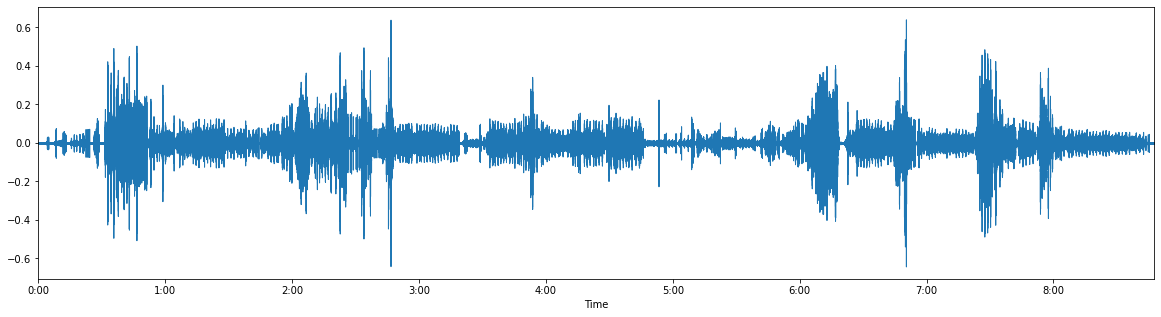

In [17]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(y=samples,sr=sampling_rate)

In [24]:
samples_abs = abs(samples)

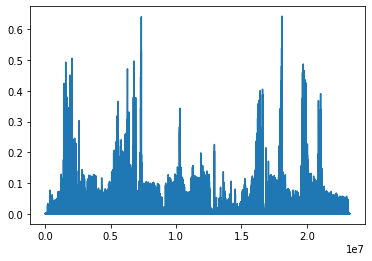

In [33]:
plt.plot(samples_abs)

In [65]:
peaks, _ = scipy.signal.find_peaks(samples_abs)
peak_amplitudes = samples_abs[peaks]
mean_amplitude = np.mean(peak_amplitudes)
median_amplitude = np.median(peak_amplitudes)
stdev = np.std(peak_amplitudes)

processed_peaks = []
for i in peaks:
  if(samples[i] > (mean_amplitude - 2*stdev)):
    processed_peaks.append(i)

In [64]:
print(len(peak_amplitudes))
print(len(processed_peaks))

4171586
4111120


In [47]:
mean_amplitude, stdev, peak_amplitudes = average_peak_amplitudes(samples)
print(mean_amplitude, stdev)

0.0029979022 0.011425962


In [ ]:
sns.displot(peak_amplitudes)
plt.xlim(0,0.1)
plt.show()

In [45]:
def average_peak_amplitudes(samples_abs):
  peaks, _ = scipy.signal.find_peaks(samples_abs)
  peak_amplitudes = samples_abs[peaks]
  mean_amplitude = np.mean(peak_amplitudes)
  median_amplitude = np.median(peak_amplitudes)
  stdev = np.std(peak_amplitudes)
  return mean_amplitude, stdev, peak_amplitudes

In [48]:
#remove certain number of STDEV below the average
def process_peak_amplitude(samples_abs, peaks, average, stdev, number):
  peaks_below_std = np.argwhere(samples_abs[peaks]<(average-number*stdev))
  processed_peaks = np.delete(peaks,peaks_below_std)
  return processed_peaks

In [49]:
peaks, _ = scipy.signal.find_peaks(samples_abs)
processed_peaks = process_peak_amplitude(samples_abs,peaks,mean_amplitude,stdev,2.5)